MAE 598: Design Optimization

Homework 3

Problem 1:

Importing libraries

In [95]:
import torch as tr
import numpy as np
from torch.autograd import Variable

Setting up the least squares problem

In [96]:
x1 = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
x2 = 1-x1
x1 = tr.tensor(x1, requires_grad=False, dtype=tr.float32) # Converting the array to tensor
x2 = tr.tensor(x2, requires_grad=False, dtype=tr.float32)
a=np.array([[8.07131, 1730.63, 233.426], [7.43155, 1554.679, 240.337]])
T = 20 # Keeping the temperature in Celcius
psat_w = 10**(a[0,0]-a[0,1]/(T+a[0,2]))
psat_di = 10**(a[1,0]-a[1,1]/(T+a[1,2]))
p = np.array([28.1, 34.4, 36.7, 36.9, 36.8, 36.7, 36.5, 35.4, 32.9, 27.7, 17.5]) 
p = tr.tensor(p, requires_grad=False, dtype=tr.float32)

# Inital guess for A is (1,1)
A = Variable(tr.tensor([1.0, 1.0]), requires_grad=True)


Using the gradient descent method to optimize the model to fit the data

In [97]:
c = 0.0001 # Step size
for i in range(1000): # Using 1000 iterations
  pred = x1*tr.exp(A[0] * (A[1] * x2 / (A[0] * x1 + A[1] * x2))**2)*psat_w + x2*tr.exp(A[1] * (A[0] * x1 / (A[0] * x1 + A[1] * x2))**2)*psat_di

  loss = (pred-p)**2 # Squared loss
  loss = loss.sum()

  loss.backward()

  with tr.no_grad(): #Gradient descent steps
    A -= c*A.grad
    A.grad.zero_()

print('The optimized values for A12 and A21 are ',A.data.numpy())
print('Least squared error for the optimized model is ',loss.data.numpy())

The optimized values for A12 and A21 are  [1.9584141 1.68919  ]
Least squared error for the optimized model is  0.67018914


Plotting the optimized model with the data for comparison

In [98]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Pressure')

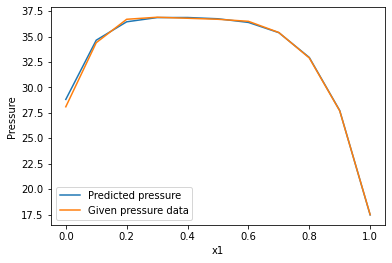

In [99]:
plt.plot(x1, pred.data.numpy(),label='Predicted pressure')
plt.plot(x1, p.data.numpy(),label='Given pressure data')
plt.legend()
plt.xlabel('x1')
plt.ylabel('Pressure')

We can see that the optimized model fits very well with the given data and we can confidently say its a good model

Problem 2:

Instaling the off the shelf libraries for Bayesian Optimiser

In [100]:
!pip install git+https://github.com/fmfn/BayesianOptimization.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/fmfn/BayesianOptimization.git to /tmp/pip-req-build-fk2j_s0g
  Running command git clone -q https://github.com/fmfn/BayesianOptimization.git /tmp/pip-req-build-fk2j_s0g


Defining the function to be optimized

In [101]:
def black_box_function(x1, x2):
    return -1*((4-2.1*x1**2+(x1**4)/3)*x1**2 + x1*x2 + (-4+4*x2**2)*x2**2)
    # Note: We multply the whole function with -1 because the optimizer that we are using can only optimize for the maximum value of the function
    # But as we need the minimum value, we can multiply with -1 and then find the maximum value and use the x1 and x2 points to then find the optimal point

Using the Bayesian Optimizer

In [102]:
from bayes_opt import BayesianOptimization

# Bounded region of parameter space
pbounds = {'x1': (-3, 3), 'x2': (-2, 2)}

# Setting up the optimizer
optimizer = BayesianOptimization(
    f=black_box_function,
    pbounds=pbounds,
    random_state=1,
)

In [103]:
# Using the optimizer to optimize with specified iteration
optimizer.maximize(
    init_points=10,
    n_iter=50,
)

|   iter    |  target   |    x1     |    x2     |
-------------------------------------------------
| 1         | 0.265     | -0.4979   | 0.8813    |
| 2         | -110.1    | -2.999    | -0.7907   |
| 3         | -26.91    | -2.119    | -1.631    |
| 4         | -2.856    | -1.882    | -0.6178   |
| 5         | -1.054    | -0.6194   | 0.1553    |
| 6         | 0.5211    | -0.4848   | 0.7409    |
| 7         | -11.28    | -1.773    | 1.512     |
| 8         | -66.76    | -2.836    | 0.6819    |
| 9         | -0.5377   | -0.4962   | 0.2348    |
| 10        | -12.02    | -2.158    | -1.208    |
| 11        | -6.707    | -0.6913   | -1.287    |
| 12        | -4.507    | 1.223     | 1.081     |
| 13        | -0.5198   | 1.354     | -0.6292   |
| 14        | -65.32    | 2.812     | 0.1161    |
| 15        | -48.23    | 1.016     | -2.0      |
| 16        | -49.11    | 0.3388    | 2.0       |
| 17        | -1.532    | 0.7023    | 0.103     |
| 18        | -68.92    | 2.385     | 2.0       |


In [104]:
optimizer.max

{'target': 1.0115704394498088,
 'params': {'x1': -0.10700282912859552, 'x2': 0.6640235693051855}}

We get the x1 and x2 points as (-0.10700282912859552, 0.6640235693051855)

We can calculate the function value as negative of the target value -1*1.0115704394498088

=-1.0115704394498088

Thus we get the optimized point for the function using Bayesian Optimization